Danny Ryan
Lab 06
3/1/2020
Text Mining

Overall, I have found data mining to be very interesting. Previous to this class I had heard about machine learning and data mining and how effective it can be, and now I think it is even more important. The ability to take messy data, clean it up, and then analyze the data and use it as a predictor is a much needed task.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix


In [ ]:
file = 'https://drive.google.com/uc?export=download&id=1u_8wAeimcuUtZSgcDhvhd0SK8KE5fHS5'
df = pd.read_csv(file)
df.head()

,Impressions,Courses,Motivation_grade,Motivation_future_career,Motivation_intellectual_challenge,Motivation_code_cool_stuff,Motivation_social_interaction,Motivation_ahead_of_time,Confidence_java,Confidence_python,Confidence_nested_loops,Confidence_pseudocode,Confidence_summations,Confidence_partial_derivatives,Confidence_vector_dot_product,Confidence_linear_regression,Confidence_conditional_probability
0,"buzzwordy, but needed. I'm excited to learn de...","CSC 111 Data Science and Visualization, CSC 23...",6.0,7.0,7.0,7.0,4.0,4.0,7.0,5.0,7.0,6.0,1.0,1.0,1.0,3.0,5.0
1,I don’t know much about them,"CSC 230 Computer Science II, CSC 301 Database ...",6.0,4.0,4.0,6.0,2.0,4.0,5.0,5.0,6.0,6.0,3.0,3.0,2.0,2.0,6.0
2,These two concepts seem intimately intertwined...,"CSC 111 Data Science and Visualization, CSC 23...",6.0,7.0,5.0,6.0,6.0,6.0,5.0,7.0,7.0,7.0,4.0,6.0,2.0,7.0,4.0
3,"To me, data mining is being able to harvest da...","CSC 230 Computer Science II, CSC 242 Organizat...",7.0,7.0,6.0,6.0,3.0,7.0,7.0,2.0,7.0,6.0,7.0,3.0,1.0,2.0,4.0
4,I believe data mining is looking through code ...,"CSC 230 Computer Science II, CSC 242 Organizat...",7.0,6.0,5.0,7.0,4.0,5.0,4.0,3.0,4.0,3.0,4.0,4.0,1.0,2.0,2.0


In [ ]:
data = pd.DataFrame(df)
data.head(5)

,Impressions,Courses,Motivation_grade,Motivation_future_career,Motivation_intellectual_challenge,Motivation_code_cool_stuff,Motivation_social_interaction,Motivation_ahead_of_time,Confidence_java,Confidence_python,Confidence_nested_loops,Confidence_pseudocode,Confidence_summations,Confidence_partial_derivatives,Confidence_vector_dot_product,Confidence_linear_regression,Confidence_conditional_probability
0,"buzzwordy, but needed. I'm excited to learn de...","CSC 111 Data Science and Visualization, CSC 23...",6.0,7.0,7.0,7.0,4.0,4.0,7.0,5.0,7.0,6.0,1.0,1.0,1.0,3.0,5.0
1,I don’t know much about them,"CSC 230 Computer Science II, CSC 301 Database ...",6.0,4.0,4.0,6.0,2.0,4.0,5.0,5.0,6.0,6.0,3.0,3.0,2.0,2.0,6.0
2,These two concepts seem intimately intertwined...,"CSC 111 Data Science and Visualization, CSC 23...",6.0,7.0,5.0,6.0,6.0,6.0,5.0,7.0,7.0,7.0,4.0,6.0,2.0,7.0,4.0
3,"To me, data mining is being able to harvest da...","CSC 230 Computer Science II, CSC 242 Organizat...",7.0,7.0,6.0,6.0,3.0,7.0,7.0,2.0,7.0,6.0,7.0,3.0,1.0,2.0,4.0
4,I believe data mining is looking through code ...,"CSC 230 Computer Science II, CSC 242 Organizat...",7.0,6.0,5.0,7.0,4.0,5.0,4.0,3.0,4.0,3.0,4.0,4.0,1.0,2.0,2.0


In [ ]:
data.tail(n=5)

,Impressions,Courses,Motivation_grade,Motivation_future_career,Motivation_intellectual_challenge,Motivation_code_cool_stuff,Motivation_social_interaction,Motivation_ahead_of_time,Confidence_java,Confidence_python,Confidence_nested_loops,Confidence_pseudocode,Confidence_summations,Confidence_partial_derivatives,Confidence_vector_dot_product,Confidence_linear_regression,Confidence_conditional_probability
29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data1 = data.dropna()

In [ ]:
data1.tail(n=5)

,Impressions,Courses,Motivation_grade,Motivation_future_career,Motivation_intellectual_challenge,Motivation_code_cool_stuff,Motivation_social_interaction,Motivation_ahead_of_time,Confidence_java,Confidence_python,Confidence_nested_loops,Confidence_pseudocode,Confidence_summations,Confidence_partial_derivatives,Confidence_vector_dot_product,Confidence_linear_regression,Confidence_conditional_probability
19,"Having taken ""data mining"" in the business sch...","CSC 111 Data Science and Visualization, CSC 23...",7.0,7.0,7.0,7.0,7.0,7.0,5.0,2.0,6.0,2.0,7.0,2.0,7.0,5.0,2.0
20,I've had a bit of exposure to machine learning...,"CSC 111 Data Science and Visualization, CSC 23...",7.0,5.0,5.0,5.0,4.0,6.0,5.0,5.0,5.0,2.0,7.0,7.0,7.0,7.0,7.0
21,"Cleaning, transforming, mining data with the a...","CSC 230 Computer Science II, CSC 301 Database ...",7.0,7.0,6.0,6.0,7.0,6.0,6.0,5.0,7.0,5.0,6.0,4.0,7.0,7.0,6.0
22,Sounds cool,"CSC 230 Computer Science II, CSC 242 Organizat...",7.0,7.0,7.0,7.0,5.0,5.0,6.0,6.0,7.0,7.0,7.0,6.0,6.0,5.0,6.0
23,"I think data mining is very powerful, and can ...","CSC 111 Data Science and Visualization, CSC 23...",6.0,7.0,6.0,7.0,6.0,6.0,7.0,5.0,7.0,6.0,7.0,7.0,6.0,6.0,5.0


In [ ]:
imp = data1['Impressions']
imp

0     buzzwordy, but needed. I'm excited to learn de...
1                          I don’t know much about them
2     These two concepts seem intimately intertwined...
3     To me, data mining is being able to harvest da...
4     I believe data mining is looking through code ...
5                   I have positive impressions of them
6                             Innovative, ever-evolving
7     I find it fascinating how data mining is becom...
8                               I think its interesting
9     A little nervous but willing to put in the wor...
10    Automating processes using large data sets to ...
11    It is about taking large, unorganized data and...
12    I think it’s mind boggling that humans have be...
13    Mostly related to artificial intelligence and ...
14    I heard that the course is very interesting an...
15    I'm excited to learn about data mining. I love...
16    Like everything, data mining and machine learn...
17    Using python dynamically to scrape data an

In [ ]:
stop = ['but','I','to','mostly','very','think','bit','in', 'the', 'a', 'it']
stop

['but', 'I', 'to', 'mostly', 'very', 'think', 'bit', 'in', 'the', 'a', 'it']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


In [ ]:
count_vec = CountVectorizer(lowercase= True, stop_words= stop)
sparse_count = count_vec.fit_transform(imp)

In [ ]:
count_vec.get_feature_names()

['ability',
 'able',
 'about',
 'accuracy',
 'aid',
 'algorithm',
 'am',
 'amazon',
 'an',
 'analysis',
 'analytics',
 'analyze',
 'and',
 'answers',
 'applying',
 'are',
 'around',
 'artificial',
 'assume',
 'assuming',
 'automating',
 'bad',
 'based',
 'be',
 'become',
 'becoming',
 'been',
 'being',
 'believe',
 'big',
 'boggling',
 'both',
 'business',
 'buzzwordy',
 'by',
 'can',
 'capable',
 'centered',
 'cleaning',
 'code',
 'coding',
 'comes',
 'completing',
 'computer',
 'computers',
 'concepts',
 'condition',
 'constructing',
 'cool',
 'course',
 'crawling',
 'curious',
 'data',
 'databases',
 'decisions',
 'deeper',
 'degree',
 'determine',
 'discipline',
 'dm',
 'do',
 'don',
 'dynamically',
 'efficiency',
 'efficient',
 'ever',
 'everything',
 'evolving',
 'excited',
 'experience',
 'exposure',
 'extremely',
 'fascinating',
 'fields',
 'financial',
 'find',
 'fit',
 'for',
 'forward',
 'from',
 'future',
 'gathering',
 'get',
 'good',
 'had',
 'hands',
 'harvest',
 'has',


In [ ]:
feat = count_vec.get_feature_names()
feat

['ability',
 'able',
 'about',
 'accuracy',
 'aid',
 'algorithm',
 'am',
 'amazon',
 'an',
 'analysis',
 'analytics',
 'analyze',
 'and',
 'answers',
 'applying',
 'are',
 'around',
 'artificial',
 'assume',
 'assuming',
 'automating',
 'bad',
 'based',
 'be',
 'become',
 'becoming',
 'been',
 'being',
 'believe',
 'big',
 'boggling',
 'both',
 'business',
 'buzzwordy',
 'by',
 'can',
 'capable',
 'centered',
 'cleaning',
 'code',
 'coding',
 'comes',
 'completing',
 'computer',
 'computers',
 'concepts',
 'condition',
 'constructing',
 'cool',
 'course',
 'crawling',
 'curious',
 'data',
 'databases',
 'decisions',
 'deeper',
 'degree',
 'determine',
 'discipline',
 'dm',
 'do',
 'don',
 'dynamically',
 'efficiency',
 'efficient',
 'ever',
 'everything',
 'evolving',
 'excited',
 'experience',
 'exposure',
 'extremely',
 'fascinating',
 'fields',
 'financial',
 'find',
 'fit',
 'for',
 'forward',
 'from',
 'future',
 'gathering',
 'get',
 'good',
 'had',
 'hands',
 'harvest',
 'has',


In [ ]:
print(feat[:10])

['ability', 'able', 'about', 'accuracy', 'aid', 'algorithm', 'am', 'amazon', 'an', 'analysis']


In [ ]:
sparse_count

<24x229 sparse matrix of type '<class 'numpy.int64'>'
	with 373 stored elements in Compressed Sparse Row format>

In [ ]:
counts = sparse_count.todense()
counts

matrix([[0, 0, 1, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 1, 0, 0],
        ...,
        [1, 0, 0, ..., 2, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
sparse_tfidf = tfidf_transformer.fit_transform(counts)
tfidf = sparse_tfidf.todense()
tfidf

matrix([[0.        , 0.        , 0.14043099, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.35205268, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.13118017, 0.        ,
         0.        ],
        ...,
        [0.35958469, 0.        , 0.        , ..., 0.53226667, 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

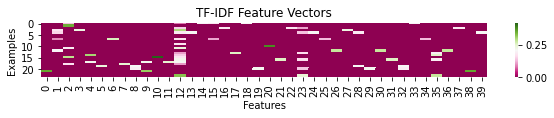

In [ ]:
plt.figure(figsize=(10, 1))
sns.heatmap(tfidf[:,:40], square=False, annot=False, cbar=True, cmap="PiYG")
            

plt.xticks(rotation=90) 
plt.xlabel('Features')
plt.ylabel('Examples')
plt.title('TF-IDF Feature Vectors')
plt.show()

In [ ]:
new_example = ['Overall, I have found data mining to be very interesting. Previous to this class I had heard about machine learning and data mining and how effective it can be, and now I think it is even more important. The ability to take messy data, clean it up, and then analyze the data and use it as a predictor is a much needed task.']

In [ ]:
new_counts = count_vec.transform(new_example)
print('New feature counts:\n', new_counts.todense())
new_tfidf = tfidf_transformer.transform(new_counts)
new_tfidf = new_tfidf.todense()
print('\nNew TF-IDF scores:')
new_tfidf

New feature counts:
 [[1 0 1 0 0 0 0 0 0 0 0 1 5 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 1
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0
  0 0 0 2 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 2 0 0 0 1 1 1 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0]]

New TF-IDF scores:


matrix([[0.20115189, 0.        , 0.13847323, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.20115189, 0.43098245, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.25935708, 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.14887515, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.34478596, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0

In [ ]:
idx = np.argmax(new_tfidf)
feat = count_vec.get_feature_names()[idx]
print('Highest valued feature: {}, TF-IDF score: {:.2f}'.format(feat, new_tfidf[0, idx]))

Highest valued feature: and, TF-IDF score: 0.43
